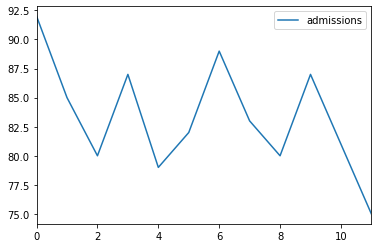

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_dataset = pd.read_csv(r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\hospital_admissions.csv")
csv_dataset.plot()

plt.show()

# Moving average algorithm

This algorithm helps us to forecast new observations based on a time series. 

And the algorithm uses smoothing methods. 

The moving average algorithm is used only on time series that __DOESN'T have a trend__. 

This method is by far the easiest and it consists of making the arithmethic mean of the last ,,n'' observations contained by the time series to forecast the next observation. We use the following formula:

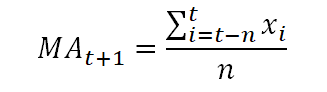

We need to find the optimal number, n" of observation to be used in the forecast. 

We can find it by checking the square error mean of multiple n observations. 

We should start at 3 observations and we can go up to half of the data set size + 1.

we are going to build an algorithm that finds the best n observations to be used in the forecast by starting at 3 observation up to half of the data set + 1 observations and use that optimal n to forecast the t + 1 observation. 

The algorithm calculates the mean square error for n  arguments than for n+1 and so on. After it has the MSE of all the n variants, it picks the one with the minimum MSE.

In [3]:
optimal_n = None
best_mse  = None

db = csv_dataset.iloc[:, :].values.astype('float32')

In [4]:
db

array([[92.],
       [85.],
       [80.],
       [87.],
       [79.],
       [82.],
       [89.],
       [83.],
       [80.],
       [87.],
       [81.],
       [75.]], dtype=float32)

In [5]:
mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))
mean_results_for_all_possible_n_values

array([0., 0., 0., 0.])

In [6]:
for n in range(3, int(len(db) / 2 + 1)):
    
    mean_for_n = np.zeros(len(db) - n)
    
    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[:, 0][i:i+n]) - db[i + n][0], 2)
    
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)

optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse  = np.min(mean_results_for_all_possible_n_values)

print("MSE       = %s" % mean_results_for_all_possible_n_values)
print("Best MSE  = %s" % best_mse)
print("Optimal n = %s" % optimal_n)

MSE       = [17.99999887 24.6328125  24.92571524 21.48610899]
Best MSE  = 17.99999886972364
Optimal n = 3


After the optimal n observations were found, we can forecast the t+1 observation as following:

In [7]:
db[:, 0]

array([92., 85., 80., 87., 79., 82., 89., 83., 80., 87., 81., 75.],
      dtype=float32)

In [8]:
len(db)

12

In [9]:
db[:, 0][(len(db) - optimal_n) : len(db)]

array([87., 81., 75.], dtype=float32)

In [10]:
print("MA = %s" % np.mean(db[:, 0][len(db) - optimal_n:len(db)]))

MA = 81.0


# Forecast evaluation
we will evaluate the forecast for the best n values with the real data and show the t+1 observation.

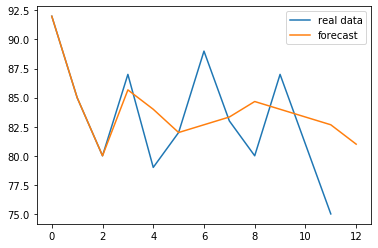

In [11]:
forecast = np.zeros(len(db) + 1)

for i in range(0, optimal_n):
    forecast[i] = db[i][0]
    
for i in range(0, len(db) - optimal_n + 1):
        forecast[i+optimal_n] = np.mean(db[:, 0][i:i+optimal_n])
        
plt.plot(db[:, 0],label = 'real data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.show()